In [2]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
df = pd.read_csv('Sample - Superstore.csv', index_col = 0)

In [41]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [42]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

<AxesSubplot:xlabel='Order Date', ylabel='count'>

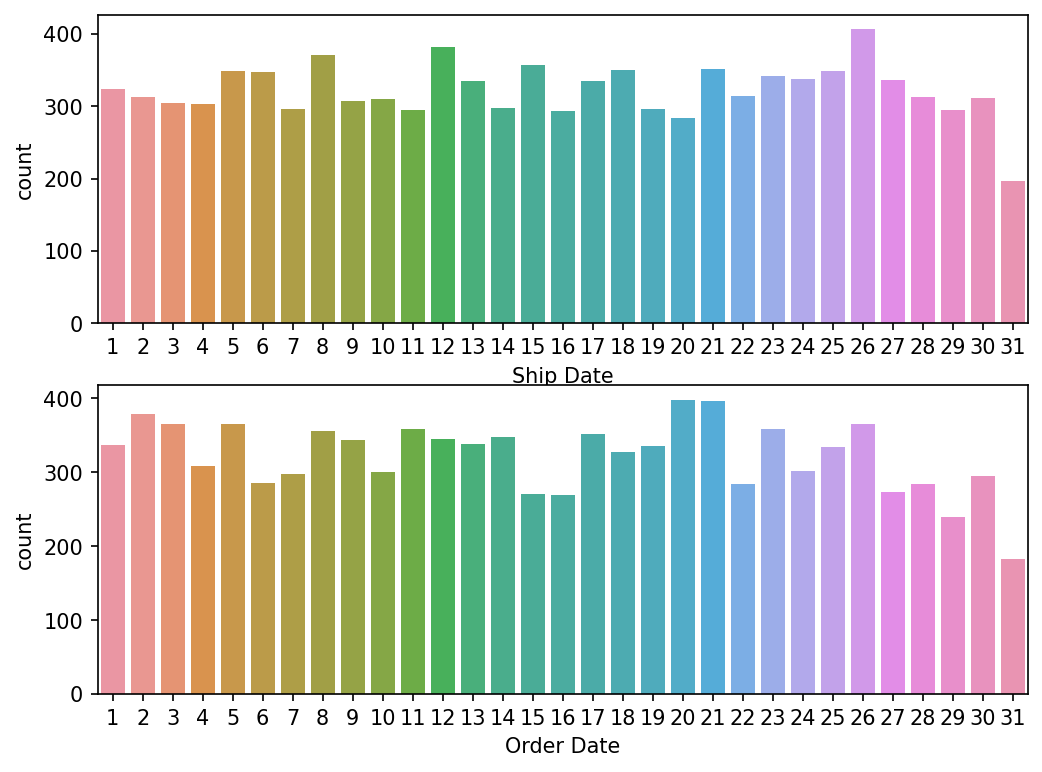

In [89]:
## Check that the dates were parsed correctly, if dates were parsed incorrectly we would not expect any day values above 12


fig, axs = plt.subplots(nrows = 2, dpi=150, figsize=(8,6))
sns.countplot(x = df['Ship Date'].dt.day, ax=axs[0])
sns.countplot(x = df['Order Date'].dt.day, ax=axs[1])

In [142]:
# Create a days to ship column "order date - ship date"

df['day_to_ship'] = (df['Ship Date'] - df['Order Date']).dt.days

# Reorder columns so date/time values or adjacent

df = df[['Order ID', 'Order Date', 'Ship Date', 'day_to_ship', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit']]
df.head()

,Order ID,Order Date,Ship Date,day_to_ship,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Days to Ship

### Below we will explore one of our key logistics KPI's: our days to ship an item.

As shown in our eda below our average days to ship from 2014 - 2017 ranges from 3.90 days to 4 days. While there is significant room for improvement we are extremely consistent on a year over year basis. 2018 YTD stands as an outlier. We only have 5 days of data to report on but our current days to ship stands at 4.92 days which is a deviation of 1.92 days from previous years. There is little to no correlation between days to ship and seasonality in previous years so 2018 remains a close watch over upcoming weeks as we get more shipping data, if we don't see a reversion back to our mean we will need to explore shipping impacts and seek corrective action.

One area of concern is our days to ship by ship class, while we are fulfilling same day shipments with a success rate of 99.76%. Our average days to ship on all other classes is greater than 2.5 days which speaks to a possible resource issue in warehouse/shipping. While our shipping personal are able to fulfill same day orders most of the time based on the below data our shipping personal are working on a shipping backlog of greater than 2.5 days on average for all other ship classes. Shipping/warehouse department should be consulted with to confirm possible resource constraints or opportunities to improve days to ship.

Reducing days to ship provides us a clear line of sight to improved product pull through and increased top line revenue by optimizing warehouse space for products available for sale vs. sold product storage which improves product pull through and prevents shipping/receiving log jambs.

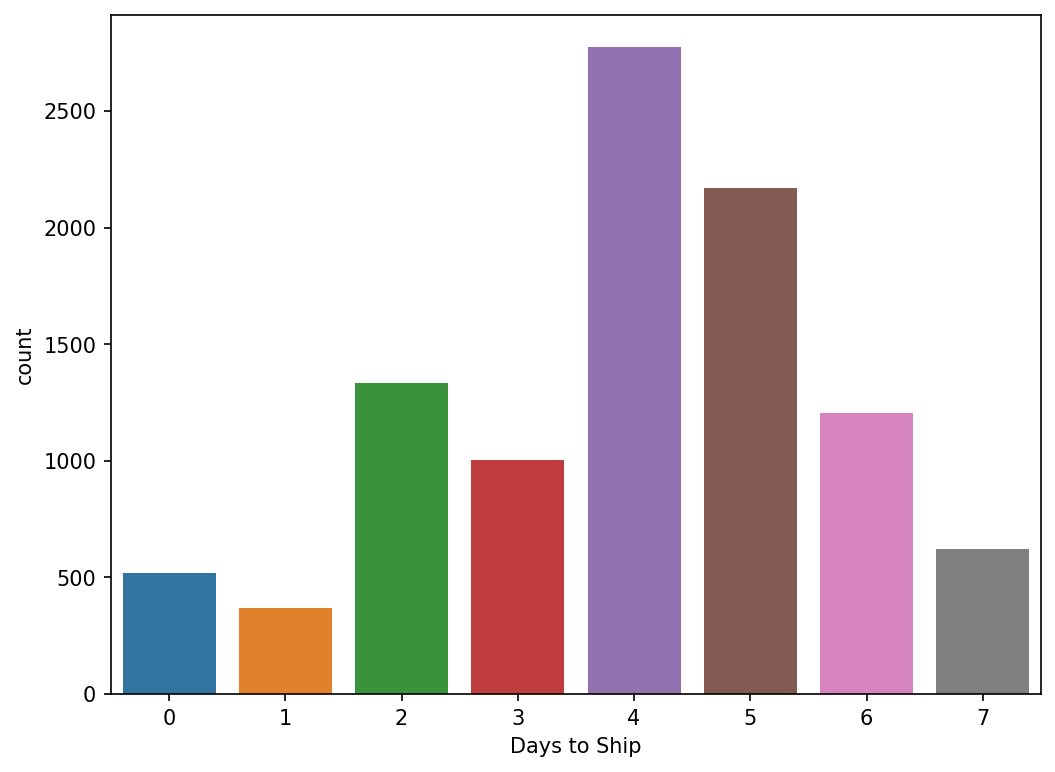

In [148]:
plt.figure(dpi=150, figsize=(8,6))

sns.countplot(x = df['day_to_ship'].sort_values(), data = df)
plt.xlabel('Days to Ship');

# A significant amount of our orders take 4-5 days to ship (ship date - initial order)

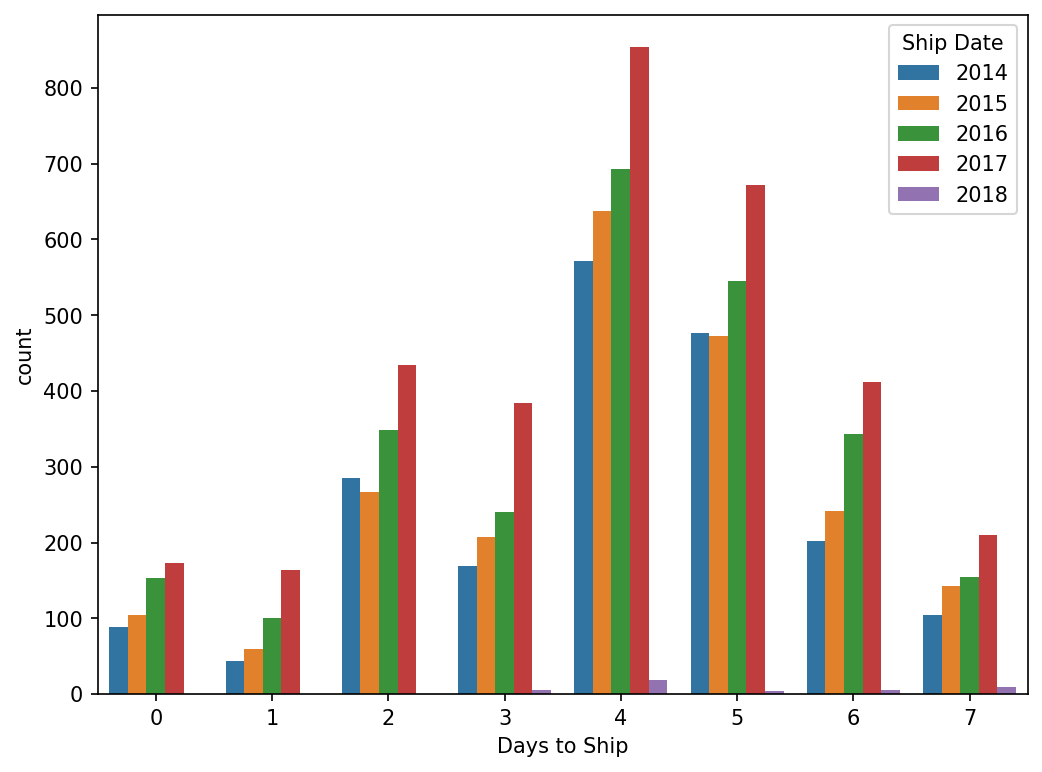

In [149]:
plt.figure(dpi=150, figsize=(8,6))

sns.countplot(x = df['day_to_ship'].sort_values(), data = df, hue = df['Ship Date'].dt.year)
plt.xlabel('Days to Ship');

# Days to ship seems consistent across years there seems to be little to no improvement year over year

In [175]:
avg_d_ship = df.groupby(df['Ship Date'].dt.year).mean()
avg_d_ship[['day_to_ship','Sales','Profit']]

# Average days to ship, sales and profit by year. The below frame further expands on the above chart.
# Our average day to ship for the years 2014 - 2017 is 4 days, 2018 YTD laggin at 4.92 days to ship


,day_to_ship,Sales,Profit
Ship Date,,,
2014,3.984021,242.465563,24.377694
2015,4.018301,224.984750,29.507992
2016,3.939876,237.131789,32.172654
2017,3.906146,221.280568,27.958485
2018,4.928571,122.849924,22.256890


Text(0, 0.5, 'Days to Ship')

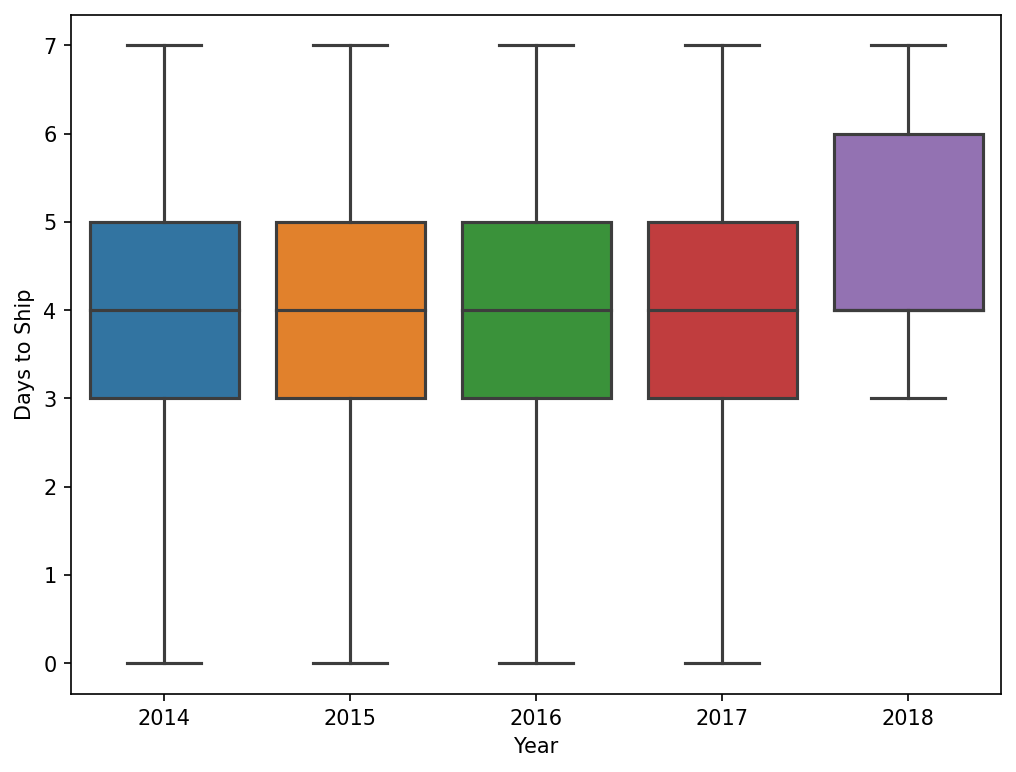

In [173]:
plt.figure(dpi=150, figsize=(8,6))

sns.boxplot(x = df['Ship Date'].dt.year, y = 'day_to_ship', data = df)
plt.xlabel('Year')
plt.ylabel('Days to Ship')

# As seen in the boxplot below with our median around 4 days and our IQR between 3-5 days for years 2014 - 2017
# 2018 appears to be an outlier but with such a small amount of data it would be unwise to make any business decision based 
# on current data. 2018 remains a watch-out if days to ship doesn't revert back to mean further action needs to be taken
# to improve shipdate

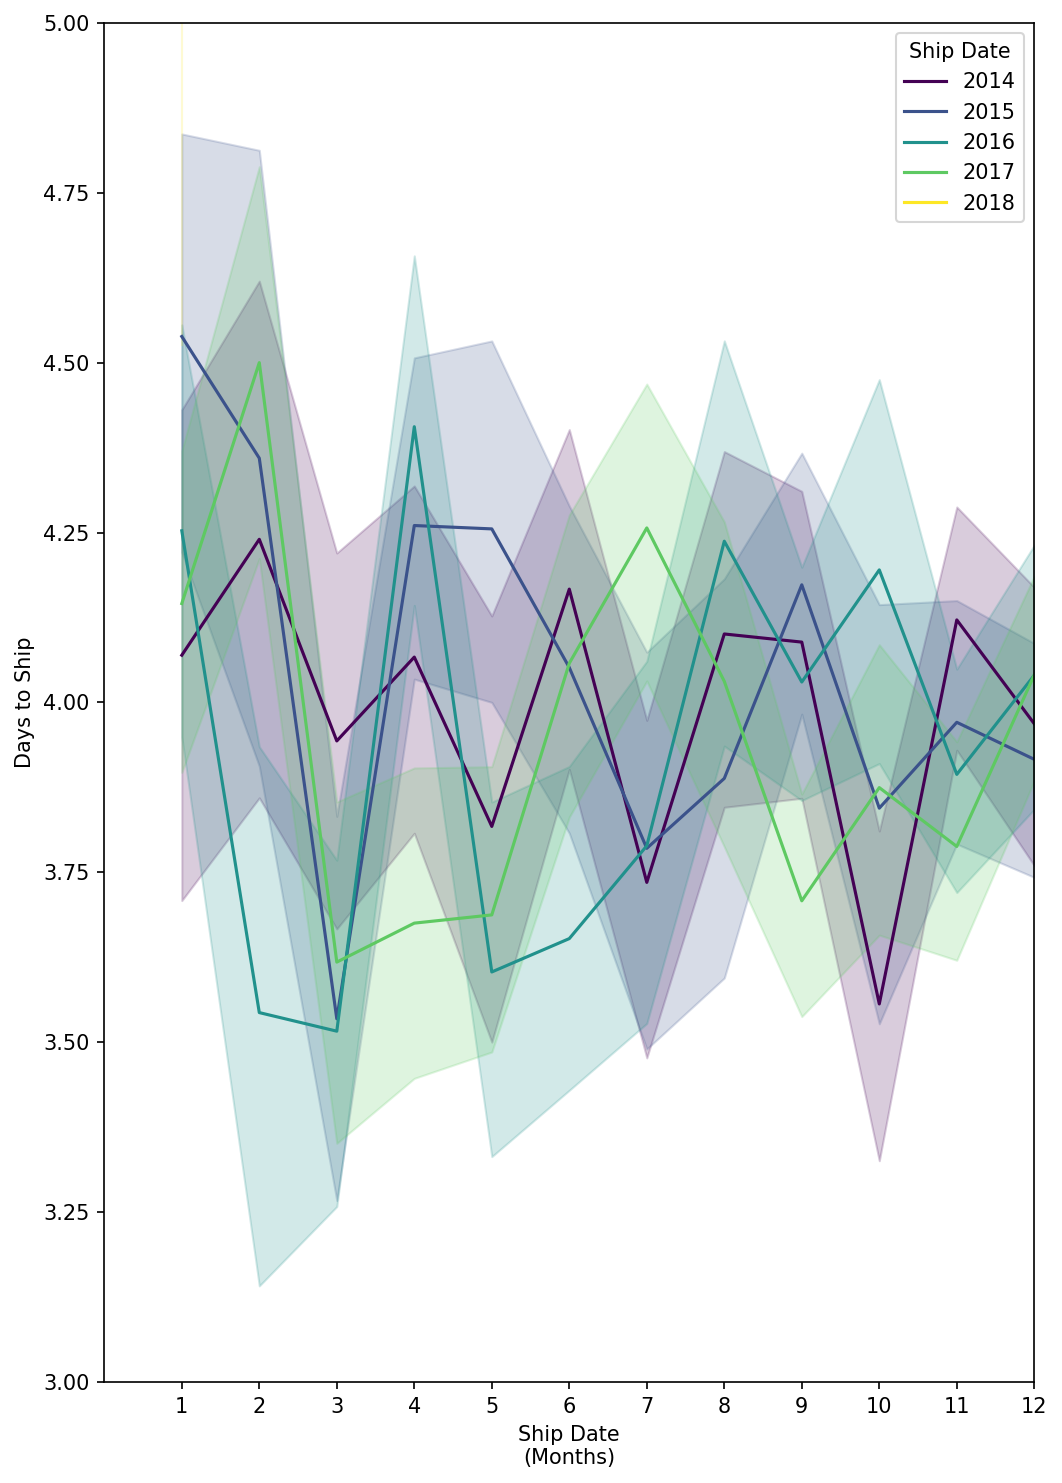

In [237]:
plt.figure(dpi=150, figsize=(8,12))
sns.lineplot(x = df['Ship Date'].dt.month, y = 'day_to_ship', data = df, hue = df['Ship Date'].dt.year, palette = 'viridis')
plt.xticks(ticks = range(1,13))
plt.ylabel("Days to Ship")
plt.xlabel("Ship Date" "\n" "(Months)")
plt.xlim(0,12)
plt.ylim(3,5);

# In the lineplot below I sought to explore the possibility that seasonality may have an effect on days to ship but based 
# on the below chart there appears to be little to no correlation between the month and days to ship.
# while some of the values and error values are highest in january/february that does not appear to be a consistant trend
# With no clear trend in seasonality it is even more important to keep a close eye on ship for the remainder of january 2018
# to ensure the days to ship does not continue moving away from the mean

In [243]:
df_corr = df[['Ship Date','day_to_ship']]
df_corr['Ship Date'] = df['Ship Date'].dt.month
df_corr.corr()

# As expected there's a weak correlation between month and days to ship

<ipython-input-243-0950cd221174>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Ship Date'] = df['Ship Date'].dt.month


,Ship Date,day_to_ship
Ship Date,1.000000,-0.009657
day_to_ship,-0.009657,1.000000


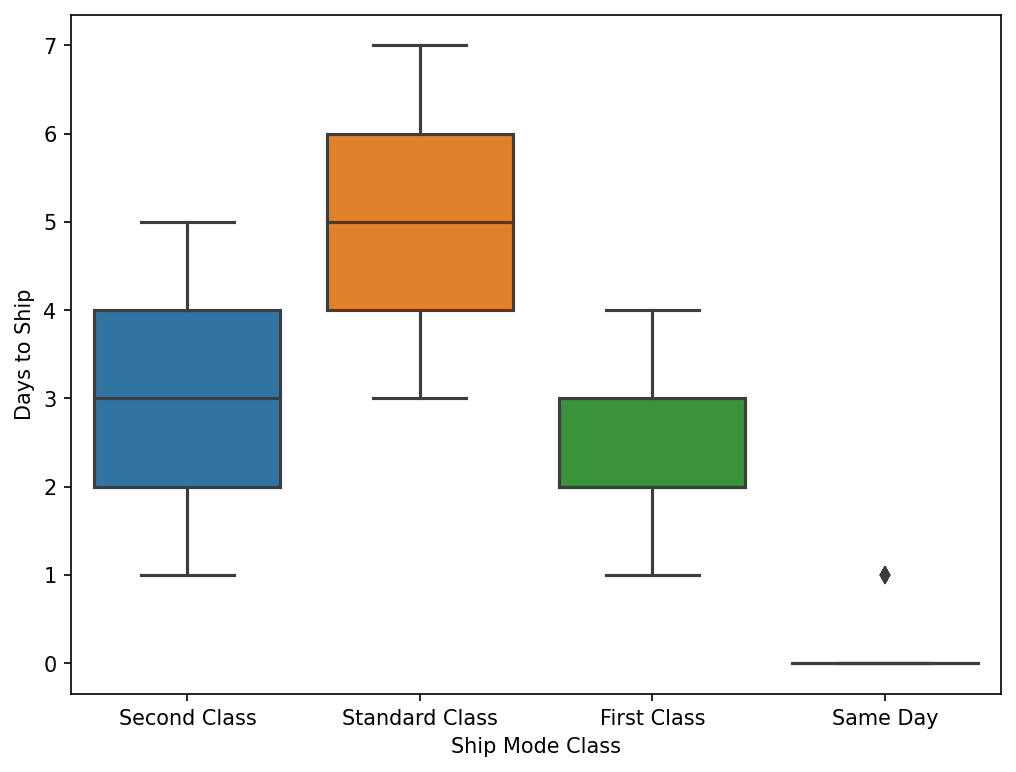

In [258]:
plt.figure(dpi=150, figsize=(8,6))

sns.boxplot(x = 'Ship Mode' , y = 'day_to_ship', data = df)
plt.xlabel('Ship Mode Class')
plt.ylabel('Days to Ship');

In [265]:
# Percentage of Same day deliviers that took greater than 0 days to ship
(df[(df['Ship Mode'] == 'Same Day') & df['day_to_ship'] > 0]['day_to_ship'].count()/df['day_to_ship'].count())*100

0.24014408645187113